# Деревья решений

Деревья решений - один из наиболее популярных методов классификации. Одной из причин их популярности является то, что окончательную модель крайне легко понять - достаточно построить граф решений и посмотреть, почему был сделан тот или иной прогноз.
$$ $$
Также деревья решений являются основой таких методов как бэггинг, случайные леса и градиентный бустинг, о которых будем говорить позднее.

По сути, деревьями принятия решений решается задача бинарной классификации.

Перейдем к алгоритму деревьев решений, реализованному в библиотеке *sklearn* - CART. Его можно использовать как для задач классификации, так и для задач регрессии. Мы сосредоточимся на задаче классификации.

Модель CART представляет собой двоичное дерево - каждый узел может иметь нуль, один или два дочерних узла.

Узел представляет собой точку разделения входных данных, а конечный (терминальный) узел - выходную переменную, которая будет использоваться для прогнозирования.

Посмотрим, как строится такое дерево на упрощенном примере, показывающем выживаемость пассажиров корабля Титаник на основе возраста (age), пола (sex) и наличия супруга и братьев и сестер (sibsp)  на борту.

![](https://248006.selcdn.ru/public/DS_Block2_M5_final/CART_titanic.png)

Десятичные числа под листьями показывают вероятность выживания, а целые - процент наблюдений (от общего количества пассажиров) в листе.

Если со структурой дерева все понятно, то как понять, каким образом лучше разделить выборку данных? Ведь у нас не всегда бинарные признаки  типа "имеется дом" или "не имеется" - в этом наборе данных, например, есть непрерывная переменная "возраст". В этом случае помогут определенные критерии качества разбиения. Обычно в задаче классификации используются энтропия или неопределенность Джини.

По своей сути *энтропия* - это степень хаоса в системе: чем больше различных элементов в множестве, тем выше его энтропия.
В целом, алгоритм подбирает такое разбиение, чтобы минимизировать энтропию, т.е. уменьшить количество объектов разных классов в листе.
Чем более однородно множество (преобладают шарики какого-то одного цвета) — тем меньше его комбинаторная энтропия, и наоборот — чем больше различных элементов в множестве, тем выше его энтропия.

Неопределенность Джини можно интерпретировать как вероятность неправильной классификации, если предсказывать классы с вероятностями их появления в этом узле. Соответственно, чем меньше неопределенность Джини, тем более точно работает модель.

На деле минимизация энтропии и неопределенность Джини работают почти одинаково - график энтропии очень близок к графику удвоенной неопределенности Джини, поэтому разница в их использовании будет минимальна.

Модель предоставляет возможность варьировать различные гиперпараметры алгоритма, такие как критерий разбиения, максимальная глубина дерева, стратегия разбиения на поддеревья, минимальное количество объектов в листе и т.д. 

Когда мы строим деревья решений, существует большой риск переобучения, так как дерево можно разбить на сколько угодно поддеревьев, которые способны разделять обучающий набор данных вплоть до листов, в которых будет всего один элемент - для предсказаний такие деревья почти бесполезны, так как они слишком точно описывают один тестовый набор данных, в то время как другие данные, которые необходимо классифицировать, могут сильно от него отличаться. В целом, не существует одного правила, которое бы описывало построение любого дерева - в каждом случае критерий останова подбирается индивидуально. Однако можно предложить несколько эвристических правил:
- заранее определенная максимальная глубина дерева (количество узлов одного уровня в дереве - по сути, количество ветвей от первого узла до листа) чревата тем, что будут пропущены важные, но труднообнаруживаемые разбиения, поэтому лучше использовать последующую обрезку дерева, когда сначала строится все дерево решений, а потом по определенным правилам производится его обрезка (например, отсекаются те узлы и ветви, использование которых мало влияет на качество классификации - не сильно уменьшает ошибки);
- разбиение должно быть нетривиальным, т.е. полученные в результате узлы должны сорержать не менее заданного количества объектов - как мы уже отметили,  переобученная на тренировочных данных модель не имеет практической пользы для классификации новых данных;
- если даже усеченные (после обрезки) деревья все еще сложны для восприятия, можно прибегнуть к методике извлечения правил (условий в узлах) из дерева с последующим созданием наборов правил в одном узле.

Мы же ограничимся тем, что построим две модели с критериями качества разбиения, которые рассматривали выше.

# Подготовка

## Импорт библиотек

In [14]:
import numpy as np
import pandas as pd

# импортируем модуль, отвечающий за деревья решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
import graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Загрузка данных

In [15]:
# загружаем данные
houses = pd.read_csv("houses.csv")
iris_dataset = load_iris() # возвращает объект с несколькими полями
houses.head()

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0


# Создание модели

## Деление выборки

In [11]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1", "dim_2"]]
y = houses["level"]

## Создание классификатора дерева решений

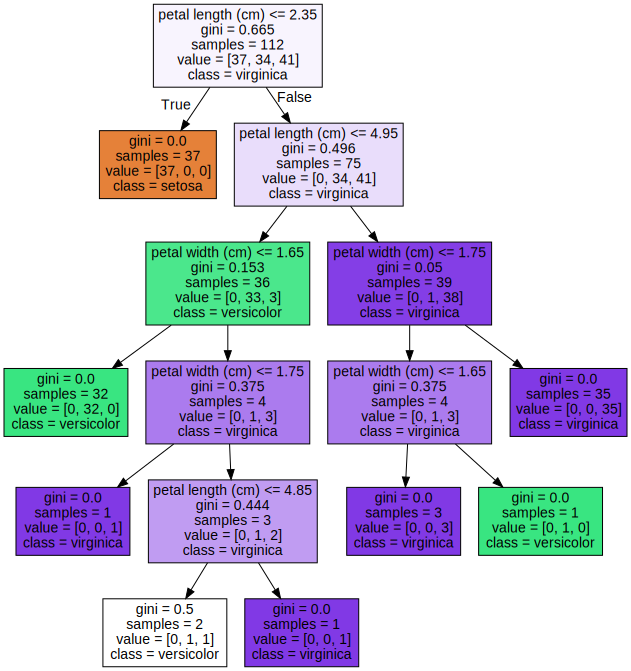

In [17]:
# создаем классификатор
dtc = DecisionTreeClassifier()


x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], 
                                                    iris_dataset['target'],
                                                    random_state=0)
dtc_model = dtc.fit(x_train, y_train)

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=iris_dataset.feature_names[2:4],  
                                    class_names=iris_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data) 

# выведем информацию для интерпретации построенной модели
#print(export_text(cl))
print_graph(dtc_model)

Такое дерево читается по цветам: чем больше в узле объектов одного класса, тем насыщеннее будет его цвет: как мы видим, при соотношении объектов внутри узла (50:50), цвет узла является чисто белым, а при преобладании объектов какого-либо из классов, он становится ближе к цвету того класса, объектов которого в узле больше. В данном случае почти во всех узлах преобладают цветки класса "virginica".

Но вообще, больше информации мы можем получить, посмотрев на условия разбиения в каждом узле (условия вида x < a).

In [18]:
dtc_predictions = dtc.predict(x_test)
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


In [19]:
dtc_entrp = DecisionTreeClassifier(criterion='entropy')
dtc_model_entrp = dtc_entrp.fit(x_train, y_train)
dtc_predictions_entrp = dtc_entrp.predict(x_test)
accuracy = dtc_entrp.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


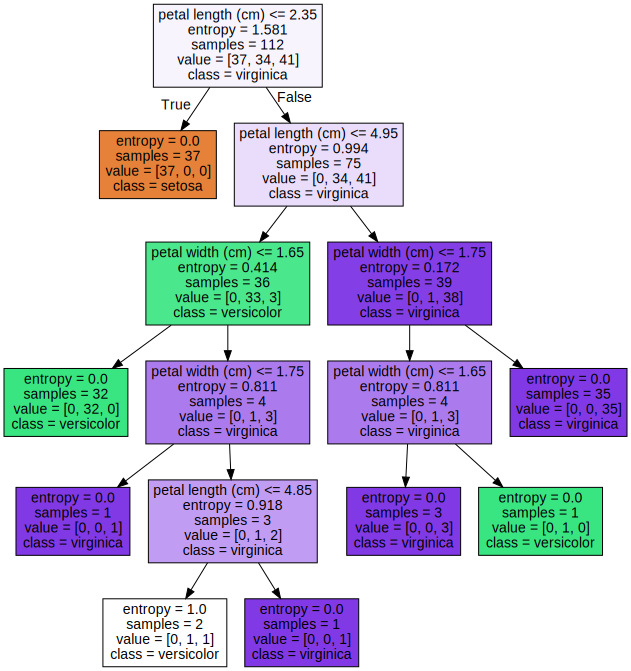

In [20]:
print_graph(dtc_model_entrp)